# 3-2,‰∏≠Èò∂APIÁ§∫ËåÉ

‰∏ãÈù¢ÁöÑËåÉ‰æã‰ΩøÁî®PytorchÁöÑ‰∏≠Èò∂APIÂÆûÁé∞Á∫øÊÄßÂõûÂΩíÊ®°ÂûãÂíåÂíåDNN‰∫åÂàÜÁ±ªÊ®°Âûã„ÄÇ

PytorchÁöÑ‰∏≠Èò∂API‰∏ªË¶ÅÂåÖÊã¨ÂêÑÁßçÊ®°ÂûãÂ±ÇÔºåÊçüÂ§±ÂáΩÊï∞Ôºå‰ºòÂåñÂô®ÔºåÊï∞ÊçÆÁÆ°ÈÅìÁ≠âÁ≠â„ÄÇ

In [1]:
import os
import datetime

#ÊâìÂç∞Êó∂Èó¥
def printbar():
    nowtime = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    print("\n"+"=========="*8 + "%s"%nowtime)



In [2]:
import torch 
print("torch.__version__="+torch.__version__) 


torch.__version__=2.4.0


### ‰∏ÄÔºåÁ∫øÊÄßÂõûÂΩíÊ®°Âûã

**1ÔºåÂáÜÂ§áÊï∞ÊçÆ**

In [3]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt 
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import Dataset,DataLoader,TensorDataset

#Ê†∑Êú¨Êï∞Èáè
n = 400

# ÁîüÊàêÊµãËØïÁî®Êï∞ÊçÆÈõÜ
X = 10*torch.rand([n,2])-5.0  #torch.randÊòØÂùáÂåÄÂàÜÂ∏É 
w0 = torch.tensor([[2.0],[-3.0]])
b0 = torch.tensor([[10.0]])
Y = X@w0 + b0 + torch.normal( 0.0,2.0,size = [n,1])  # @Ë°®Á§∫Áü©Èòµ‰πòÊ≥ï,Â¢ûÂä†Ê≠£ÊÄÅÊâ∞Âä®


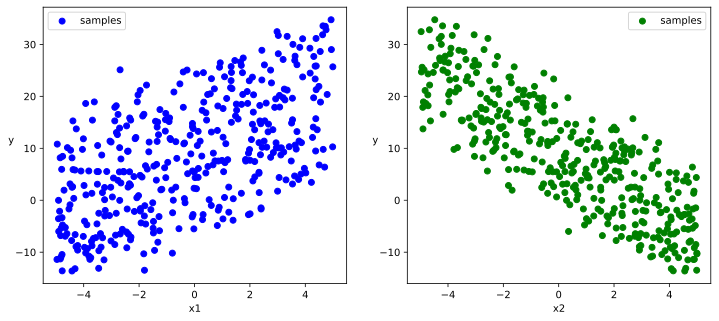

In [4]:
# Êï∞ÊçÆÂèØËßÜÂåñ

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.figure(figsize = (12,5))
ax1 = plt.subplot(121)
ax1.scatter(X[:,0],Y[:,0], c = "b",label = "samples")
ax1.legend()
plt.xlabel("x1")
plt.ylabel("y",rotation = 0)

ax2 = plt.subplot(122)
ax2.scatter(X[:,1],Y[:,0], c = "g",label = "samples")
ax2.legend()
plt.xlabel("x2")
plt.ylabel("y",rotation = 0)
plt.show()


In [5]:
#ÊûÑÂª∫ËæìÂÖ•Êï∞ÊçÆÁÆ°ÈÅì
ds = TensorDataset(X,Y)
dl = DataLoader(ds,batch_size = 10,shuffle=True,
                num_workers=2)


**2ÔºåÂÆö‰πâÊ®°Âûã**

In [6]:
model = nn.Linear(2,1) #Á∫øÊÄßÂ±Ç

model.loss_fn = nn.MSELoss()
model.optimizer = torch.optim.SGD(model.parameters(),lr = 0.01)


**3ÔºåËÆ≠ÁªÉÊ®°Âûã**

In [7]:
def train_step(model, features, labels):
    
    predictions = model(features)
    loss = model.loss_fn(predictions,labels)
    loss.backward()
    model.optimizer.step()
    model.optimizer.zero_grad() # Ê≥®ÊÑèÔºåÊñ∞ÊâãÂ∏∏Â∏∏ÈÅóÂøòËØ•Ê≠•È™§
    return loss.item()

# ÊµãËØïtrain_stepÊïàÊûú
features,labels = next(iter(dl))
train_step(model,features,labels)



117.83219146728516

In [8]:
def train_model(model,epochs):
    for epoch in range(1,epochs+1):
        for features, labels in dl:
            loss = train_step(model,features,labels)
        if epoch%10==0:
            printbar()
            w = model.state_dict()["weight"]
            b = model.state_dict()["bias"]
            print("epoch =",epoch,"loss = ",loss)
            print("w =",w)
            print("b =",b)
train_model(model,epochs = 50)



================================================================================2024-09-11 11:32:13
epoch = 10 loss =  5.4252519607543945
w = tensor([[ 2.0096, -3.0831]])
b = tensor([10.0745])

================================================================================2024-09-11 11:32:23
epoch = 20 loss =  2.12882924079895
w = tensor([[ 1.9980, -3.0327]])
b = tensor([10.0678])

================================================================================2024-09-11 11:32:33
epoch = 30 loss =  7.46990442276001
w = tensor([[ 2.0105, -3.0031]])
b = tensor([10.0299])

================================================================================2024-09-11 11:32:43
epoch = 40 loss =  8.291831970214844
w = tensor([[ 2.0403, -3.0898]])
b = tensor([10.0460])

================================================================================2024-09-11 11:32:53
epoch = 50 loss =  3.9394378662109375
w = tensor([[ 2.0661, -3.0650]])
b = tensor([10.0238])


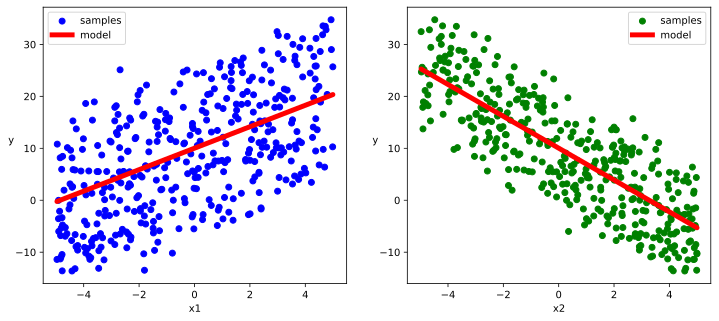

In [9]:
# ÁªìÊûúÂèØËßÜÂåñ

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

w,b = model.state_dict()["weight"],model.state_dict()["bias"]

plt.figure(figsize = (12,5))
ax1 = plt.subplot(121)
ax1.scatter(X[:,0],Y[:,0], c = "b",label = "samples")
ax1.plot(X[:,0],w[0,0]*X[:,0]+b[0],"-r",linewidth = 5.0,label = "model")
ax1.legend()
plt.xlabel("x1")
plt.ylabel("y",rotation = 0)



ax2 = plt.subplot(122)
ax2.scatter(X[:,1],Y[:,0], c = "g",label = "samples")
ax2.plot(X[:,1],w[0,1]*X[:,1]+b[0],"-r",linewidth = 5.0,label = "model")
ax2.legend()
plt.xlabel("x2")
plt.ylabel("y",rotation = 0)

plt.show()


### ‰∫åÔºå DNN‰∫åÂàÜÁ±ªÊ®°Âûã

**1ÔºåÂáÜÂ§áÊï∞ÊçÆ**

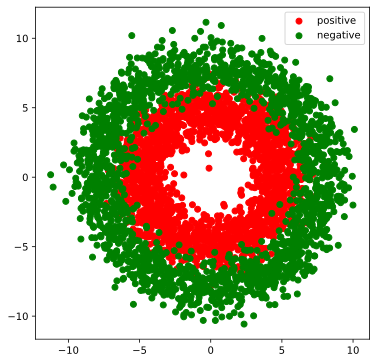

In [10]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import Dataset,DataLoader,TensorDataset
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

#Ê≠£Ë¥üÊ†∑Êú¨Êï∞Èáè
n_positive,n_negative = 2000,2000

#ÁîüÊàêÊ≠£Ê†∑Êú¨, Â∞èÂúÜÁéØÂàÜÂ∏É
r_p = 5.0 + torch.normal(0.0,1.0,size = [n_positive,1]) 
theta_p = 2*np.pi*torch.rand([n_positive,1])
Xp = torch.cat([r_p*torch.cos(theta_p),r_p*torch.sin(theta_p)],axis = 1)
Yp = torch.ones_like(r_p)

#ÁîüÊàêË¥üÊ†∑Êú¨, Â§ßÂúÜÁéØÂàÜÂ∏É
r_n = 8.0 + torch.normal(0.0,1.0,size = [n_negative,1]) 
theta_n = 2*np.pi*torch.rand([n_negative,1])
Xn = torch.cat([r_n*torch.cos(theta_n),r_n*torch.sin(theta_n)],axis = 1)
Yn = torch.zeros_like(r_n)

#Ê±áÊÄªÊ†∑Êú¨
X = torch.cat([Xp,Xn],axis = 0)
Y = torch.cat([Yp,Yn],axis = 0)


#ÂèØËßÜÂåñ
plt.figure(figsize = (6,6))
plt.scatter(Xp[:,0],Xp[:,1],c = "r")
plt.scatter(Xn[:,0],Xn[:,1],c = "g")
plt.legend(["positive","negative"]);


In [11]:
#ÊûÑÂª∫ËæìÂÖ•Êï∞ÊçÆÁÆ°ÈÅì
ds = TensorDataset(X,Y)
dl = DataLoader(ds,batch_size = 10,shuffle=True,num_workers=2)



**2, ÂÆö‰πâÊ®°Âûã**

In [12]:
class DNNModel(nn.Module):
    def __init__(self):
        super(DNNModel, self).__init__()
        self.fc1 = nn.Linear(2,4)
        self.fc2 = nn.Linear(4,8) 
        self.fc3 = nn.Linear(8,1)

    # Ê≠£Âêë‰º†Êí≠
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        y = nn.Sigmoid()(self.fc3(x))
        return y
    
    # ÊçüÂ§±ÂáΩÊï∞
    def loss_fn(self,y_pred,y_true):
        return nn.BCELoss()(y_pred,y_true)
    
    # ËØÑ‰º∞ÂáΩÊï∞(ÂáÜÁ°ÆÁéá)
    def metric_fn(self,y_pred,y_true):
        y_pred = torch.where(y_pred>0.5,torch.ones_like(y_pred,dtype = torch.float32),
                          torch.zeros_like(y_pred,dtype = torch.float32))
        acc = torch.mean(1-torch.abs(y_true-y_pred))
        return acc
    
    # ‰ºòÂåñÂô®
    @property
    def optimizer(self):
        return torch.optim.Adam(self.parameters(),lr = 0.001)
    
model = DNNModel()


In [13]:
# ÊµãËØïÊ®°ÂûãÁªìÊûÑ
(features,labels) = next(iter(dl))
predictions = model(features)

loss = model.loss_fn(predictions,labels)
metric = model.metric_fn(predictions,labels)

print("init loss:",loss.item())
print("init metric:",metric.item())


init loss: 0.8174477815628052
init metric: 0.4000000059604645


**3ÔºåËÆ≠ÁªÉÊ®°Âûã**

In [14]:
def train_step(model, features, labels):
    
    # Ê≠£Âêë‰º†Êí≠Ê±ÇÊçüÂ§±
    predictions = model(features)
    loss = model.loss_fn(predictions,labels)
    metric = model.metric_fn(predictions,labels)
    
    # ÂèçÂêë‰º†Êí≠Ê±ÇÊ¢ØÂ∫¶
    loss.backward()
    
    # Êõ¥Êñ∞Ê®°ÂûãÂèÇÊï∞
    model.optimizer.step()
    model.optimizer.zero_grad()
    
    return loss.item(),metric.item()

# ÊµãËØïtrain_stepÊïàÊûú
features,labels = next(iter(dl))
train_step(model,features,labels)


(0.821709156036377, 0.30000001192092896)

In [15]:
def train_model(model,epochs):
    for epoch in range(1,epochs+1):
        loss_list,metric_list = [],[]
        for features, labels in dl:
            lossi,metrici = train_step(model,features,labels)
            loss_list.append(lossi)
            metric_list.append(metrici)
        loss = np.mean(loss_list)
        metric = np.mean(metric_list)

        if epoch%10==0:
            printbar()
            print("epoch =",epoch,"loss = ",loss,"metric = ",metric)
        
train_model(model,epochs = 50)


================================================================================2024-09-11 11:33:28
epoch = 10 loss =  0.26463892861269417 metric =  0.9062499924004078

================================================================================2024-09-11 11:33:40
epoch = 20 loss =  0.21840777183417232 metric =  0.9147499915957451

================================================================================2024-09-11 11:33:51
epoch = 30 loss =  0.20937408159690676 metric =  0.9192499916255474

================================================================================2024-09-11 11:34:03
epoch = 40 loss =  0.21333224901289213 metric =  0.9252499923110008

================================================================================2024-09-11 11:34:14
epoch = 50 loss =  0.21735381255464745 metric =  0.9227499920129776


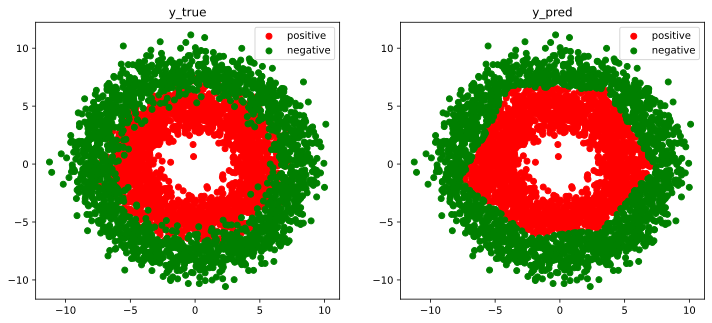

In [17]:
# ÁªìÊûúÂèØËßÜÂåñ
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize = (12,5))
ax1.scatter(Xp[:,0],Xp[:,1], c="r")
ax1.scatter(Xn[:,0],Xn[:,1],c = "g")
ax1.legend(["positive","negative"]);
ax1.set_title("y_true");

Xp_pred = X[torch.squeeze(model.forward(X)>=0.5)]
Xn_pred = X[torch.squeeze(model.forward(X)<0.5)]

ax2.scatter(Xp_pred[:,0],Xp_pred[:,1],c = "r")
ax2.scatter(Xn_pred[:,0],Xn_pred[:,1],c = "g")
ax2.legend(["positive","negative"]);
ax2.set_title("y_pred");


**Â¶ÇÊûúÊú¨‰π¶ÂØπ‰Ω†ÊúâÊâÄÂ∏ÆÂä©ÔºåÊÉ≥ÈºìÂä±‰∏Ä‰∏ã‰ΩúËÄÖÔºåËÆ∞ÂæóÁªôÊú¨È°πÁõÆÂä†‰∏ÄÈ¢óÊòüÊòüstar‚≠êÔ∏èÔºåÂπ∂ÂàÜ‰∫´Áªô‰Ω†ÁöÑÊúãÂèã‰ª¨Âñîüòä!** 

Â¶ÇÊûúÂØπÊú¨‰π¶ÂÜÖÂÆπÁêÜËß£‰∏äÊúâÈúÄË¶ÅËøõ‰∏ÄÊ≠•Âíå‰ΩúËÄÖ‰∫§ÊµÅÁöÑÂú∞ÊñπÔºåÊ¨¢ËøéÂú®ÂÖ¨‰ºóÂè∑"ÁÆóÊ≥ïÁæéÈ£üÂ±ã"‰∏ãÁïôË®Ä„ÄÇ‰ΩúËÄÖÊó∂Èó¥ÂíåÁ≤æÂäõÊúâÈôêÔºå‰ºöÈÖåÊÉÖ‰∫à‰ª•ÂõûÂ§ç„ÄÇ

‰πüÂèØ‰ª•Âú®ÂÖ¨‰ºóÂè∑ÂêéÂè∞ÂõûÂ§çÂÖ≥ÈîÆÂ≠óÔºö**Âä†Áæ§**ÔºåÂä†ÂÖ•ËØªËÄÖ‰∫§ÊµÅÁæ§ÂíåÂ§ßÂÆ∂ËÆ®ËÆ∫„ÄÇ

![ÁÆóÊ≥ïÁæéÈ£üÂ±ãlogo.png](https://tva1.sinaimg.cn/large/e6c9d24egy1h41m2zugguj20k00b9q46.jpg)